# Project: Regression

## Red Wine Quality

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import importlib
import functions_sandbox
importlib.reload(functions_sandbox)
from functions_sandbox import cleaner, f_histogram, f_boxplot

path = r"D:.\redwine.csv"
redwine = pd.read_csv(path)

In [151]:
redwine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [152]:
redwine.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Checking basic information about dataframe, columns, variables.

In [153]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are 12 columns in total with 1600 entries.  
Mostly every column has float Dtype and describes physicochemical properties of red wine.  
Must to mention, that despite quality named column Dtype is int,  
it's variables are categorical type.

In [154]:
redwine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Data cleaning

In [155]:
redwine = cleaner(redwine, info=False)
redwine.rename(
    columns={
        "fixed acidity": "fixed_acidity",
        "volatile acidity": "volatile_acidity",
        "citric acid": "citric_acid",
        "residual sugar": "residual_sugar",
        "free sulfur dioxide": "free_so2",
        "total_sulfur_dioxide": "total_so2",
    },
    inplace=True,
)
redwine.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total sulfur dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


Some of the column labels were renamed to leave no empty spaces  
between words

## Exploratory Data Analysis (EDA)

First of all, check on how many levels of wine quality exists

In [156]:
wine_quality = sorted(redwine["quality"].unique())
print(f"wine quality levels: {wine_quality}")

wine quality levels: [3, 4, 5, 6, 7, 8]


There are 6 levels of wine quality where No.3  
is the poorest and No.8 is the highest level of wine

To check how data is distributed of wine quality  
histogram was plotted

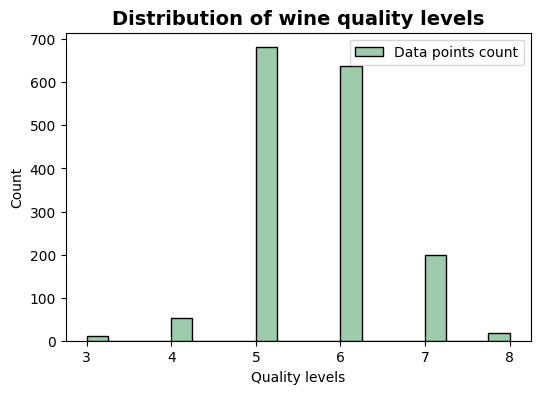

In [159]:
f_histogram(
    xaxis=redwine["quality"],
    bins=20,
    label="Data points count",
    xlabel="Quality levels",
    title="Distribution of wine quality levels",
)